# Healthcare Diabetes Classifier Project (Logistic_Regression)
## 당뇨병 진단 예측
- 당뇨병이 양성인지 음성인지 예측

#### feature (22개)
- Id: 각 데이터 항목의 고유 식별자
- Pregnancies: 임신 횟수
- Glucose: 경구 포도당 내성 테스트에서 2시간 동안의 혈장 포도당 농도
- BloodPressure: 확장기 혈압(mmHg)
- SkinThickness: 삼두근 피부주름 두께(mm)
- Insulin: 2시간 혈청 인슐린(mu U/ml)
- BMI: 체질량 지수(체중(kg) / 키(m^2))
- DiabetesPedigreeFunction: 당뇨병의 유전적 점수인 당뇨병 혈통 기능
- Age: 나이(년)


#### target
- Outcome: 당뇨병의 존재(1) 또는 부재(0)를 나타내는 이진 분류

In [1]:
import pandas as pd

# 데이터 세트 호출
h_df = pd.read_csv('./datasets/Healthcare_Diabetes.csv', low_memory=False)
h_df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


### 🌟 1Cycle

#### 📊 데이터 탐색

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

In [3]:
# 데이터 정보 확인
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
# 데이터 세트 형태 확인
h_df.shape

(2768, 10)

In [5]:
# 데이터 컬럼명 확인
h_df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# 가장 위에 있는 데이터 5개 확인
h_df.head(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 가장 아래에 있는 데이터 5개 확인
h_df.tail(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [8]:
# 타겟 데이터 비중 확인
h_target = h_df['Outcome'].value_counts().reset_index()
h_target

,Outcome,count
0,0,1816
1,1,952


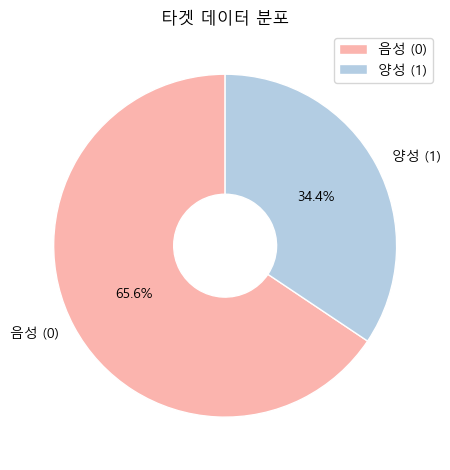

In [9]:
# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

h_counts = h_target['count']
h_labels = h_target['Outcome']

# 새로운 라벨 리스트 생성
new_labels = ['음성 (0)' if label == 0 else '양성 (1)' for label in h_labels]

# 그래프 그리기
plt.pie(h_counts, labels=new_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('타겟 데이터 분포')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# 결측치 확인
h_df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# null 값 확인
h_df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# 중복행 확인
h_df.duplicated().sum()

0

#### 📊 전처리

In [13]:
# 불필요한 데이터 세트 제거 (id 컬럼)
pre_h_df = h_df.drop(labels='Id', axis=1)
pre_h_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


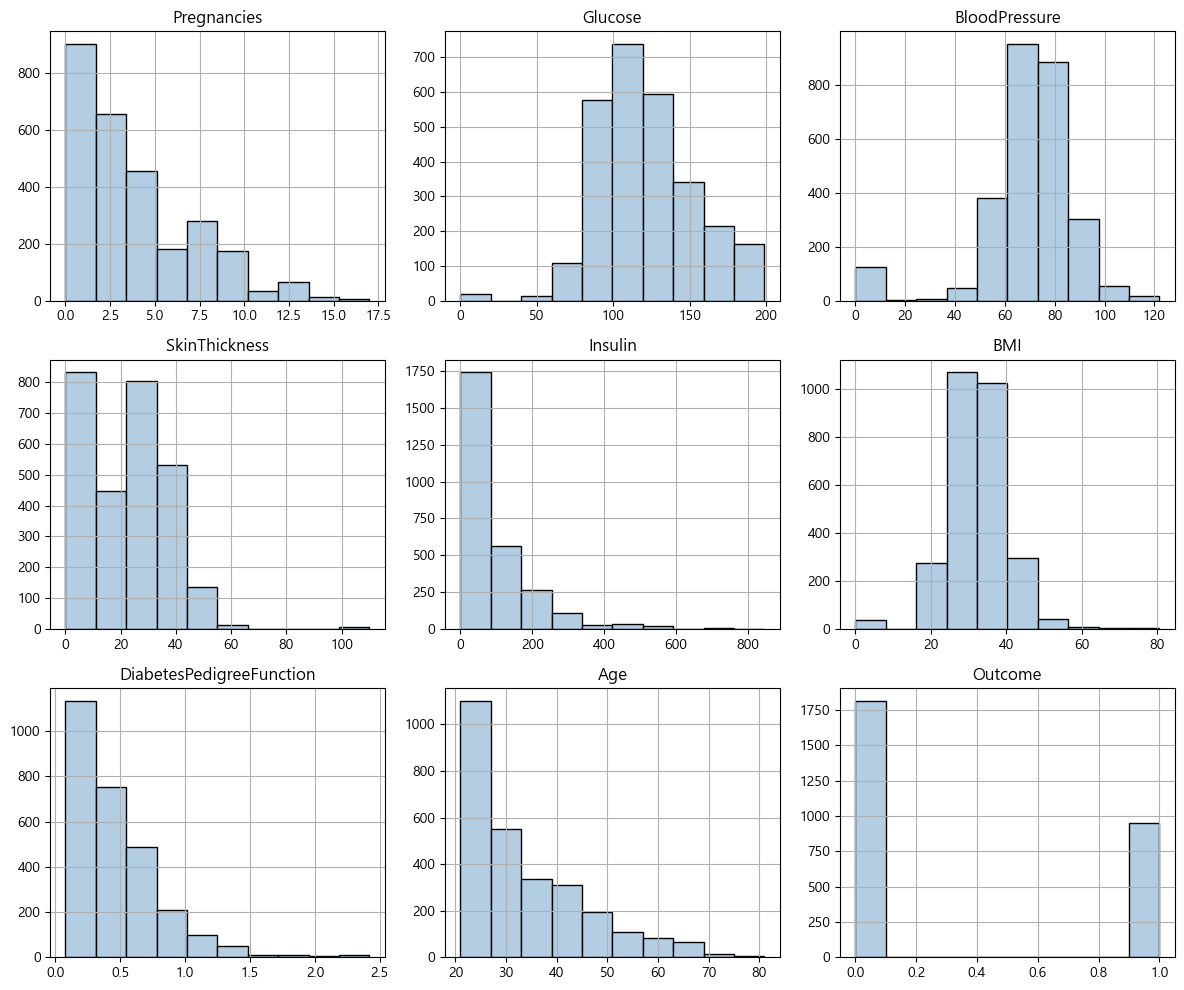

In [14]:
# 데이터 분포 확인
pre_h_df.hist(figsize=(12, 10), color=cmap(np.array([1])), edgecolor='black')

plt.tight_layout()
plt.show()

In [15]:
# 상관관계 확인
pre_h_df.corr()['Outcome'].sort_values(ascending=False)[1:]

Glucose                     0.460644
BMI                         0.280928
Age                         0.237050
Pregnancies                 0.223796
DiabetesPedigreeFunction    0.160664
Insulin                     0.123646
SkinThickness               0.075603
BloodPressure               0.072900
Name: Outcome, dtype: float64

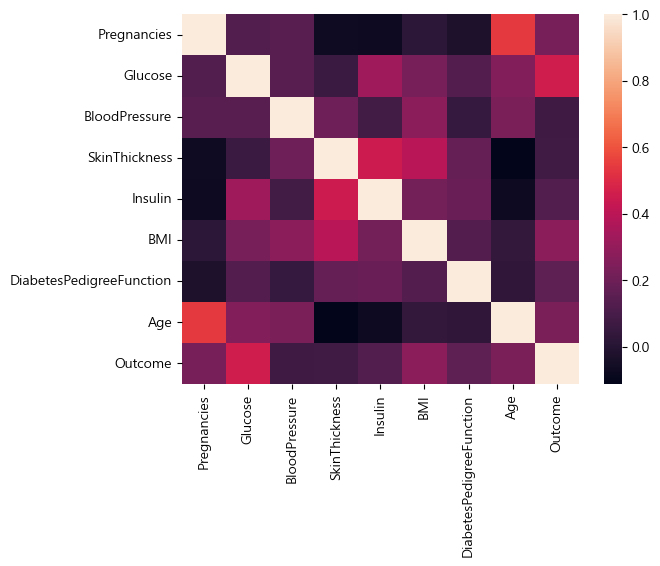

In [16]:
import seaborn as sns

# 상관관계 히트맵으로 확인
sns.heatmap(pre_h_df.corr())
plt.show()

#### 📊 Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train, y_train)

# 예측
prediction = lg.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[323  40]
 [ 96  95]]
정확도: 0.7545, 정밀도: 0.7037, 재현율: 0.4974, F1:0.5828, AUC:0.6936
###########################################################################


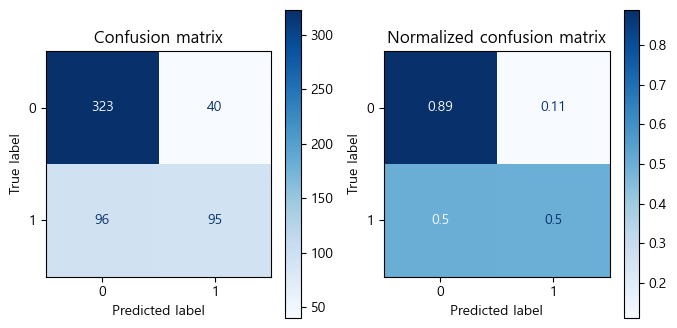

In [19]:
get_evaluation(y_test, prediction, lg, X_test)

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

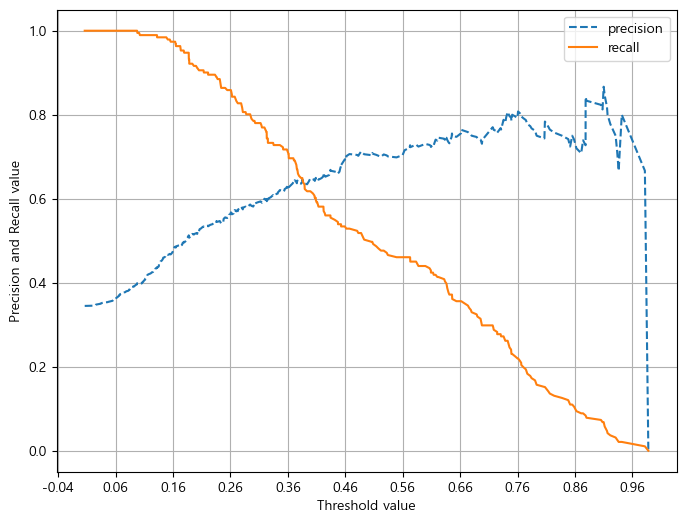

In [22]:
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

In [23]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

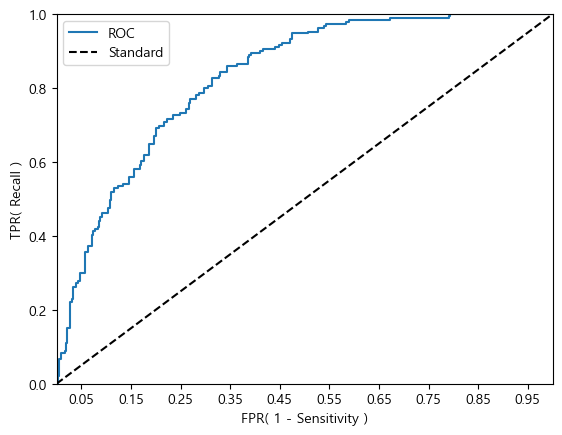

In [24]:
roc_curve_plot(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1))

### 🌟 2Cycle

In [26]:
# under sampling
Outcome0 = pre_h_df[pre_h_df.Outcome == 0].sample(952, random_state=124)
Outcome1 = pre_h_df[pre_h_df.Outcome == 1]
pre_h_df = pd.concat([Outcome0, Outcome1]).reset_index(drop=True)

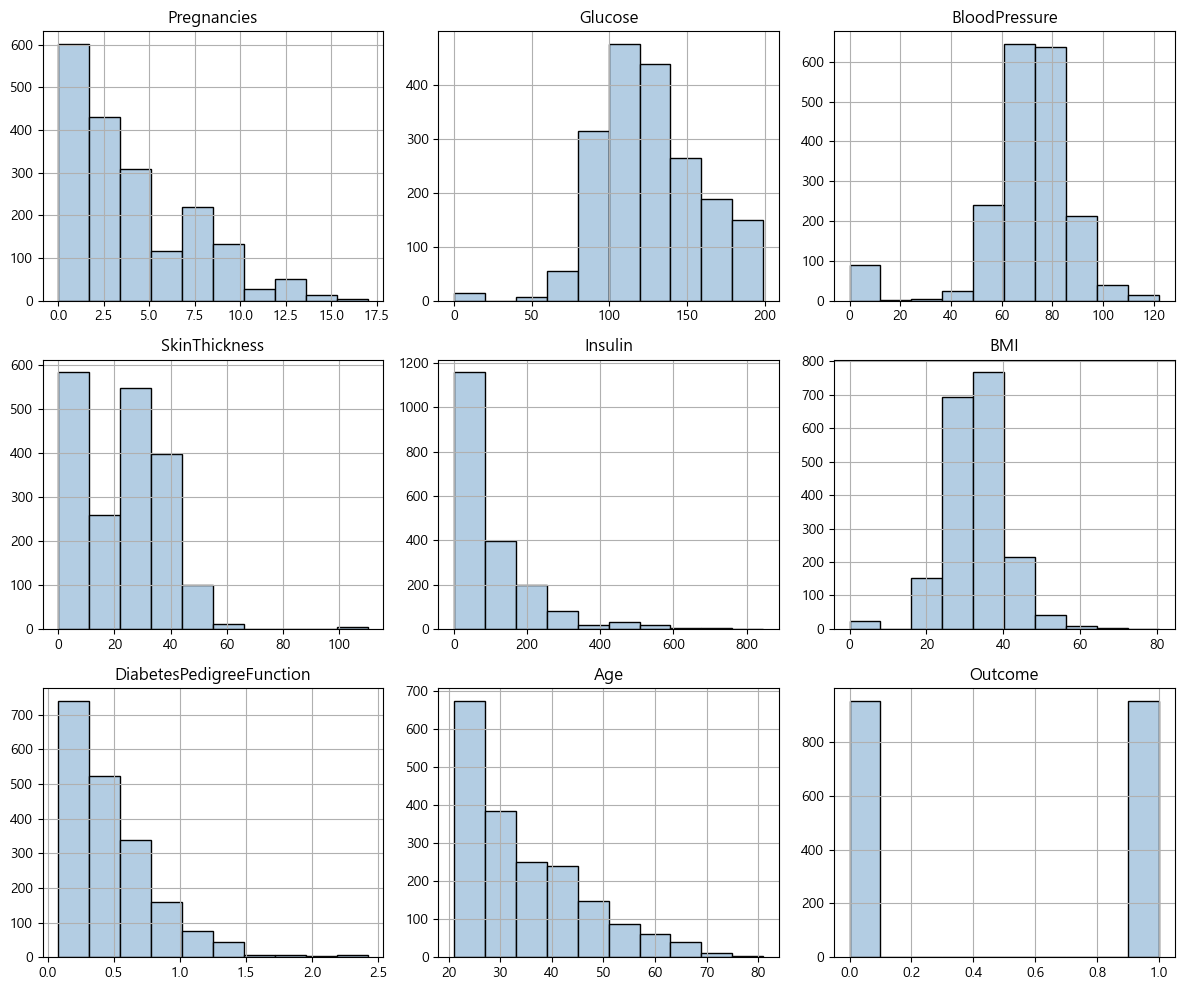

In [27]:
# 데이터 분포 확인
pre_h_df.hist(figsize=(12, 10), color=cmap(np.array([1])), edgecolor='black')

plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train, y_train)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[142  49]
 [ 52 138]]
정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349
###########################################################################


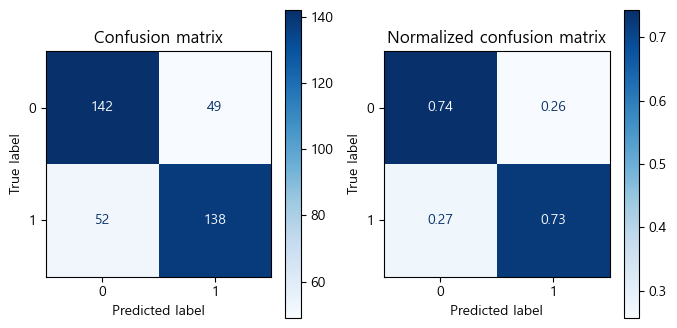

In [29]:
get_evaluation(y_test, prediction, lg, X_test)

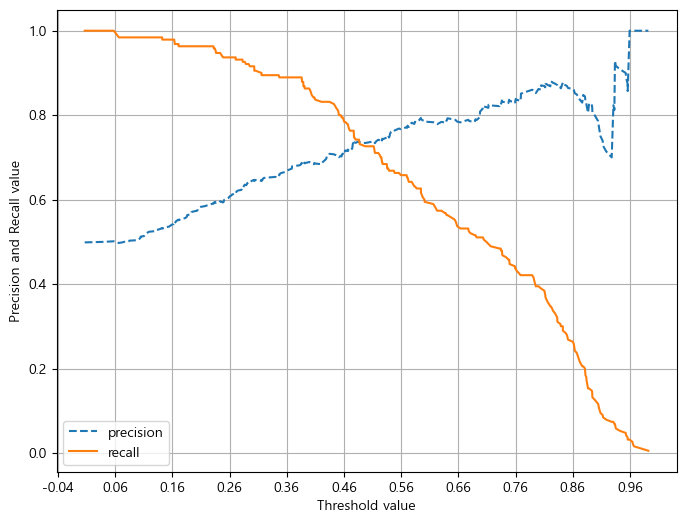

In [30]:
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

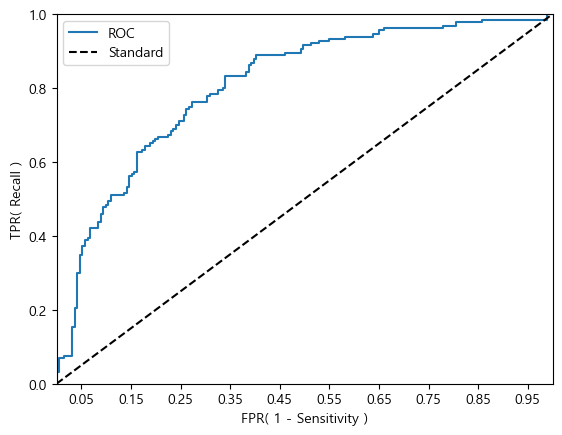

In [31]:
roc_curve_plot(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1))

### 🌟 3Cycle

In [37]:
import torch
from sklearn.model_selection import train_test_split
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

# 랜덤 값 지정
torch.manual_seed(124)

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 검증 데이터 분리
val_X_train, val_X_test, val_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 텐서로 변경 (차원 조정)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

val_X_train = torch.FloatTensor(val_X_train.values)
val_y_train = torch.FloatTensor(val_y_train.values).view(-1, 1)

val_X_test = torch.FloatTensor(val_X_test.values)
val_y_test = torch.FloatTensor(val_y_test.values).view(-1, 1)

In [39]:
# 모델
train_logistic_r = Sequential(
    Linear(8, 1), 
    Sigmoid(),
)

# 경사 하강법 (최적화 알고리즘)
optimizer_train = SGD(train_logistic_r.parameters(), lr=1e-4)

# loss list
train_loss_box = []

epochs = 100000

for epoch in range(1, epochs + 1):
    H_train = train_logistic_r(val_X_train)
    loss_train = binary_cross_entropy(H_train, val_y_train)
    train_loss_box.append(loss_train.item())

    optimizer_train.zero_grad()
    loss_train.backward()
    optimizer_train.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(train_logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(train_logistic_r.parameters())[1].item())}\nLoss: {np.round(loss_train.item(), 4)}')
        print('=' * 90)

Epoch: 10000/100000
W1: 0.0692, W2: 0.0132, W3: -0.0282, W4: -0.0001, W5: 0.0002, W6: 0.0001, W7: 0.0537, W8: 0.0048, b: -0.0
Loss: 0.6377
Epoch: 20000/100000
W1: 0.1062, W2: 0.0136, W3: -0.0283, W4: 0.0003, W5: 0.0002, W6: 0.0004, W7: 0.0645, W8: -0.0003, b: -0.0
Loss: 0.6347
Epoch: 30000/100000
W1: 0.1121, W2: 0.0137, W3: -0.0282, W4: 0.0003, W5: 0.0002, W6: 0.0007, W7: 0.0753, W8: -0.001, b: -0.0
Loss: 0.6335
Epoch: 40000/100000
W1: 0.113, W2: 0.0138, W3: -0.0281, W4: 0.0003, W5: 0.0002, W6: 0.0009, W7: 0.0858, W8: -0.0011, b: -0.0
Loss: 0.6324
Epoch: 50000/100000
W1: 0.1131, W2: 0.0138, W3: -0.028, W4: 0.0003, W5: 0.0002, W6: 0.0012, W7: 0.0962, W8: -0.001, b: -0.0
Loss: 0.6312
Epoch: 60000/100000
W1: 0.1131, W2: 0.0139, W3: -0.0278, W4: 0.0002, W5: 0.0002, W6: 0.0015, W7: 0.1063, W8: -0.0009, b: -0.0
Loss: 0.6301
Epoch: 70000/100000
W1: 0.113, W2: 0.0139, W3: -0.0277, W4: 0.0002, W5: 0.0002, W6: 0.0018, W7: 0.1163, W8: -0.0008, b: -0.0
Loss: 0.629
Epoch: 80000/100000
W1: 0.113, W2

In [40]:
# 모델
val_logistic_r = Sequential(
    Linear(8, 1), 
    Sigmoid(),
)

# 경사 하강법 (최적화 알고리즘)
optimizer_val = SGD(val_logistic_r.parameters(), lr=1e-4)

# loss list
val_loss_box = []

epochs = 100000

for epoch in range(1, epochs + 1):
    H_train = val_logistic_r(val_X_test)
    loss_val = binary_cross_entropy(H_train, val_y_test)
    val_loss_box.append(loss_val.item())

    optimizer_val.zero_grad()
    loss_val.backward()
    optimizer_val.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(val_logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(val_logistic_r.parameters())[1].item())}\nLoss: {np.round(loss_val.item(), 4)}')
        print('=' * 90)

Epoch: 10000/100000
W1: 0.164, W2: 0.0134, W3: -0.0314, W4: 0.0098, W5: 0.0005, W6: 0.0103, W7: 0.16, W8: -0.015, b: 0.0
Loss: 0.6056
Epoch: 20000/100000
W1: 0.1701, W2: 0.0136, W3: -0.0314, W4: 0.0099, W5: 0.0005, W6: 0.0109, W7: 0.1573, W8: -0.016, b: 0.0
Loss: 0.6045
Epoch: 30000/100000
W1: 0.1714, W2: 0.0137, W3: -0.0313, W4: 0.0099, W5: 0.0005, W6: 0.0112, W7: 0.1547, W8: -0.0161, b: -0.0
Loss: 0.6034
Epoch: 40000/100000
W1: 0.1716, W2: 0.0138, W3: -0.0312, W4: 0.0099, W5: 0.0005, W6: 0.0115, W7: 0.1523, W8: -0.016, b: -0.0
Loss: 0.6023
Epoch: 50000/100000
W1: 0.1715, W2: 0.0139, W3: -0.0311, W4: 0.01, W5: 0.0004, W6: 0.0118, W7: 0.1499, W8: -0.0158, b: -0.0
Loss: 0.6013
Epoch: 60000/100000
W1: 0.1714, W2: 0.0139, W3: -0.031, W4: 0.01, W5: 0.0004, W6: 0.0121, W7: 0.1477, W8: -0.0156, b: -0.0
Loss: 0.6003
Epoch: 70000/100000
W1: 0.1712, W2: 0.014, W3: -0.0309, W4: 0.01, W5: 0.0004, W6: 0.0124, W7: 0.1455, W8: -0.0155, b: -0.0
Loss: 0.5992
Epoch: 80000/100000
W1: 0.1711, W2: 0.0141,

In [41]:
# 모델
test_logistic_r = Sequential(
    Linear(8, 1), 
    Sigmoid(),
)

# 경사 하강법 (최적화 알고리즘)
optimizer_test = SGD(test_logistic_r.parameters(), lr=1e-4)

# loss list
test_loss_box = []

epochs = 100000

for epoch in range(1, epochs + 1):
    H_train = test_logistic_r(X_test)
    loss_test = binary_cross_entropy(H_train, y_test)
    test_loss_box.append(loss_test.item())

    optimizer_test.zero_grad()
    loss_test.backward()
    optimizer_test.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(test_logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(test_logistic_r.parameters())[1].item())}\nLoss: {np.round(loss_test.item(), 4)}')
        print('=' * 90)

Epoch: 10000/100000
W1: 0.1023, W2: 0.0156, W3: -0.0276, W4: -0.0058, W5: 0.002, W6: 0.0147, W7: -0.1854, W8: -0.014, b: -0.0
Loss: 0.602
Epoch: 20000/100000
W1: 0.1376, W2: 0.0162, W3: -0.0274, W4: -0.0063, W5: 0.002, W6: 0.0153, W7: -0.1793, W8: -0.0199, b: -0.0
Loss: 0.5988
Epoch: 30000/100000
W1: 0.1446, W2: 0.0163, W3: -0.0273, W4: -0.0064, W5: 0.002, W6: 0.0157, W7: -0.1732, W8: -0.0209, b: -0.0
Loss: 0.5972
Epoch: 40000/100000
W1: 0.1457, W2: 0.0164, W3: -0.0272, W4: -0.0065, W5: 0.002, W6: 0.0161, W7: -0.1671, W8: -0.021, b: -0.0
Loss: 0.5957
Epoch: 50000/100000
W1: 0.1457, W2: 0.0165, W3: -0.027, W4: -0.0065, W5: 0.002, W6: 0.0164, W7: -0.161, W8: -0.0208, b: -1.0
Loss: 0.5942
Epoch: 60000/100000
W1: 0.1454, W2: 0.0166, W3: -0.0269, W4: -0.0065, W5: 0.002, W6: 0.0168, W7: -0.155, W8: -0.0206, b: -1.0
Loss: 0.5927
Epoch: 70000/100000
W1: 0.1451, W2: 0.0167, W3: -0.0268, W4: -0.0065, W5: 0.002, W6: 0.0171, W7: -0.1492, W8: -0.0204, b: -1.0
Loss: 0.5912
Epoch: 80000/100000
W1: 0.

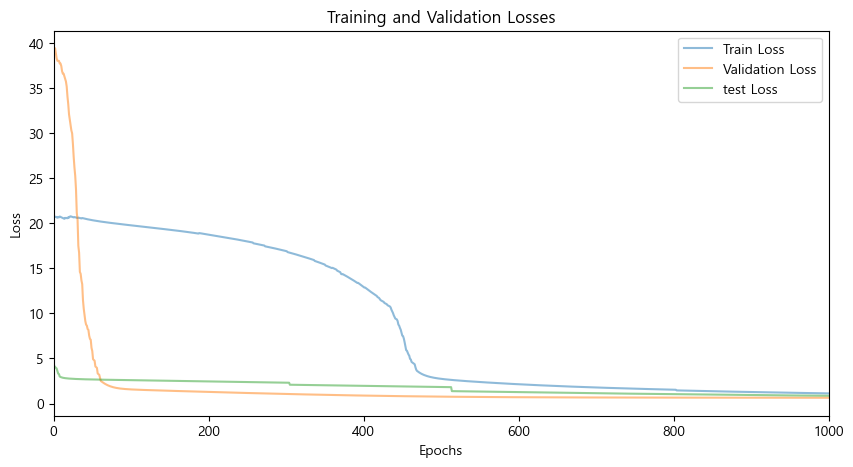

In [45]:
# 손실 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(train_loss_box, label='Train Loss', alpha=0.5)
plt.plot(val_loss_box, label='Validation Loss', alpha=0.5)
plt.plot(test_loss_box, label='test Loss', alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0,1000)
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:
get_evaluation(y_test.detach().numpy(), train_logistic_r(X_test) >= 0.5)

In [ ]:
get_evaluation(y_test.detach().numpy(), val_logistic_r(X_test) >= 0.5)

In [ ]:
get_evaluation(y_test.detach().numpy(), test_logistic_r(X_test) >= 0.5)